# Fundamentals of Data Mining - Practical Midterm
## Mohammad Bahrami - 9724133

### Imports and IO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
column_names = [f'A{i}' for i in range(1, 16)]
column_types = [str] + [float]*2 + [str]*3 + [float] + [str]*2 + [float] + [str]*2 + [float]*3

# Reading the file
dataset = pd.read_csv(
    'australian.dat',
    sep=' ',
    header=None,
    names=column_names,
    dtype=dict(zip(column_names, column_types))
)

# Renaming target column to 'label'
dataset = dataset.rename(columns={'A15': 'label'})

# Checking for any missing value to be confident that there is none
print(f'Missing Count: {dataset.isna().sum().sum()}')

# Viewing the first few samples
dataset.head()

Missing Count: 0


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,label
0,1,22.08,11.46,2,4,4,1.585,0,0,0.0,1,2,100.0,1213.0,0.0
1,0,22.67,7.00,2,8,4,0.165,0,0,0.0,0,2,160.0,1.0,0.0
2,0,29.58,1.75,1,4,4,1.250,0,0,0.0,1,2,280.0,1.0,0.0
3,0,21.67,11.50,1,5,3,0.000,1,1,11.0,1,2,0.0,1.0,1.0
4,1,20.17,8.17,2,6,4,1.960,1,1,14.0,0,2,60.0,159.0,1.0


### Part c

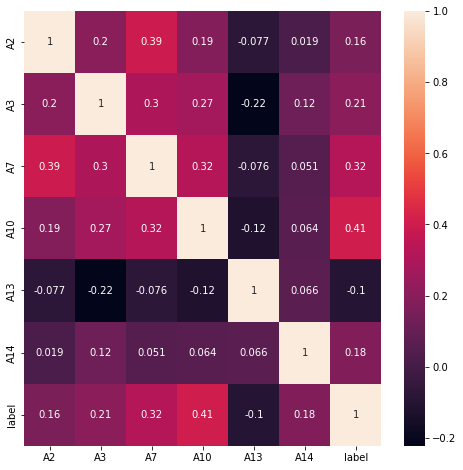

In [3]:
# First, we try to see if the numercial features have any correlation?
fig, ax = plt.subplots()
sns.heatmap(
    data=dataset.corr(),
    ax=ax,
    annot=True
)
fig.set_size_inches((8, 8))

We can see that the features don't have any significant linear correlation with each other. The features seem to have some correlation with the target value, with the highest correlation of 0.41 for the A10 attribute.

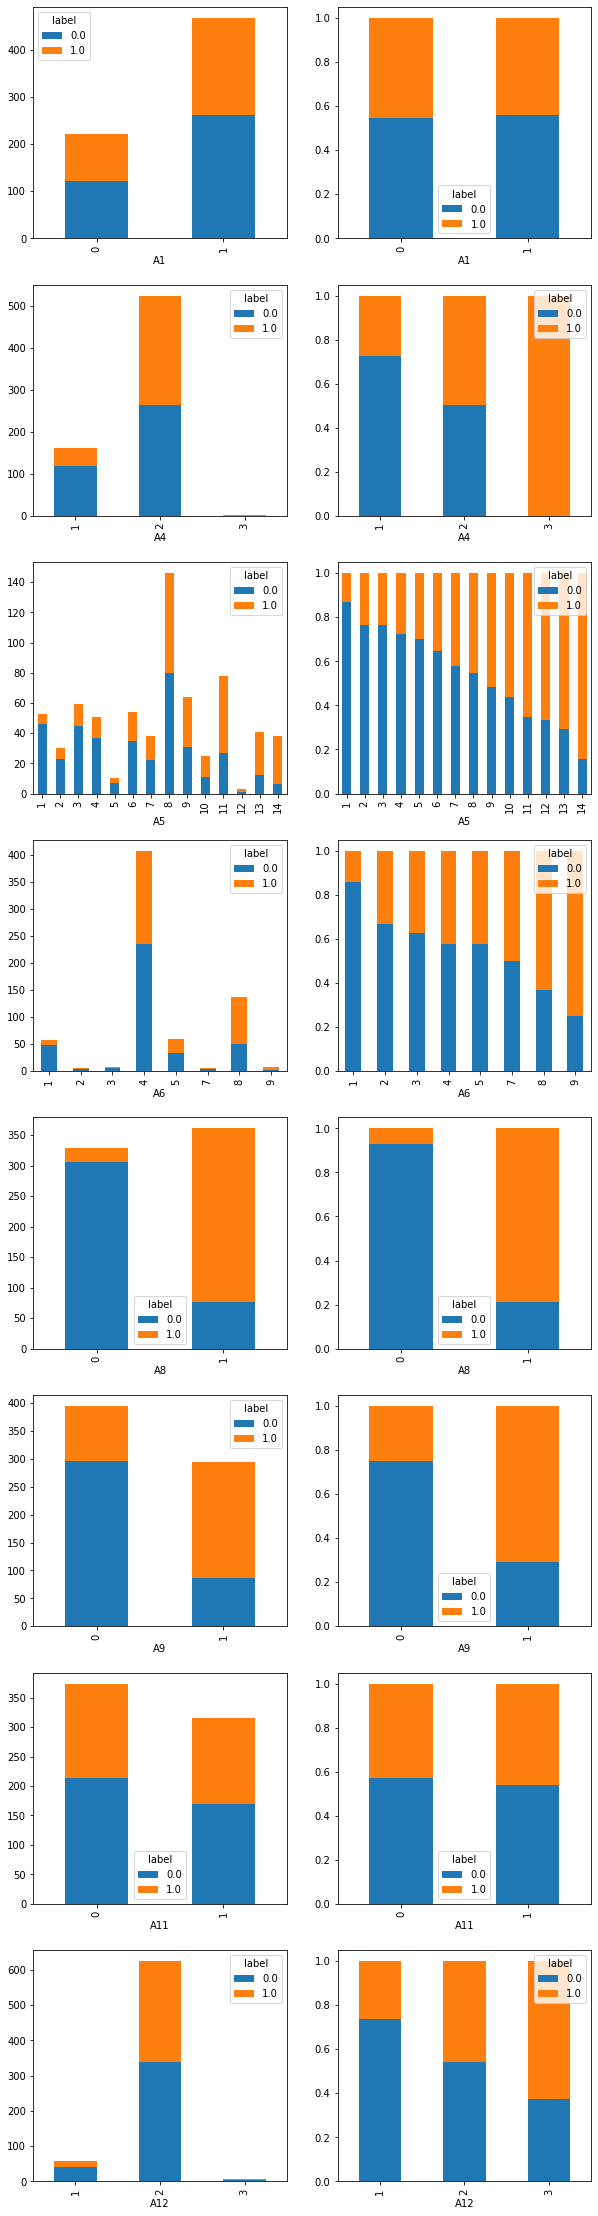

In [4]:
# Next, we can check for the correlation between the categorical values nd the target value with some bar plots.
numeric_features = dataset.loc[:, dataset.columns != 'label'].select_dtypes(include=np.number).columns.to_list()
non_numeric_features = dataset.select_dtypes(exclude=np.number).columns.to_list()

fig, axs = plt.subplots(
    nrows=len(non_numeric_features),
    ncols=2,
    squeeze=False,
    figsize=(10, 5*len(non_numeric_features))
)

for c, categorical in enumerate(non_numeric_features):
    cross = pd.crosstab(dataset[categorical].astype(int), dataset['label'])
    cross.plot.bar(
        stacked=True,
        ax=axs[c, 0]
    )
    cross = pd.crosstab(dataset[categorical].astype(int), dataset['label'], normalize='index')
    cross.plot.bar(
        stacked=True,
        ax=axs[c, 1]
    )
fig.set_facecolor('w')

we can see that features `A4, A5, A6, A8, A9, A12` have direct relation with output value and `A1, A11`

### Part d

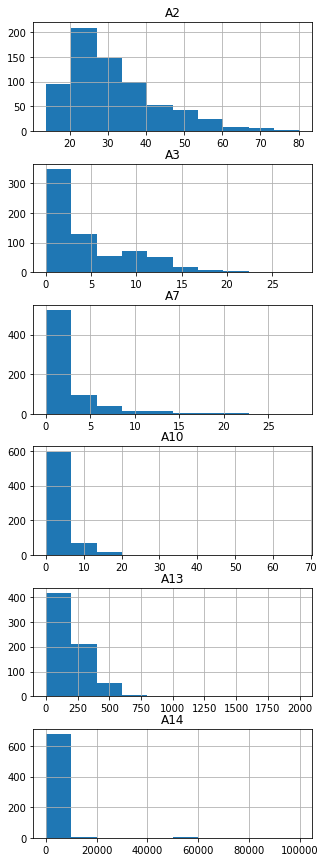

In [7]:
fig, axs = plt.subplots(6, 1)
dataset[numeric_features].hist(grid=True, ax=axs)
fig.set_size_inches((5, 15))

In [8]:
dataset[numeric_features].skew()

A2      1.155935
A3      1.488813
A7      2.891330
A10     5.152520
A13     2.749912
A14    13.140655
dtype: float64

We can see that the numeric features are highly skewed. to solve this we use `inverse square root` method.

In [13]:
dataset.loc[:, numeric_features] = dataset[numeric_features].apply(lambda z: (z+1e-6)**(-1/2))

In [15]:
dataset[numeric_features].skew()

A2    -0.046893
A3     5.786888
A7     2.645770
A10   -0.293587
A13    1.573082
A14    0.039490
dtype: float64

In [16]:
dataset.describe()

,A2,A3,A7,A10,A13,A14,label
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.186416,28.290188,102.686824,572.714867,191.367415,0.518612,0.444928
std,0.031473,163.632770,301.727703,494.789283,393.582735,0.444119,0.497318
min,0.111629,0.188982,0.187317,0.122169,0.022361,0.003162,0.000000
25%,0.162850,0.372499,0.617213,0.577350,0.060634,0.050220,0.000000
50%,0.186908,0.603023,1.000000,1000.000000,0.079057,0.408248,0.000000
75%,0.210027,1.000000,2.461822,1000.000000,0.111803,1.000000,1.000000
max,0.269680,1000.000000,1000.000000,1000.000000,1000.000000,1.000000,1.000000


we can see that the data in each numerical column has different range of values.

In [17]:
# Z-Score Normalization of numerical values
dataset.loc[:, numeric_features] = dataset.loc[:, numeric_features].apply(lambda z: (z - z.mean()) / z.std())

In [18]:
dataset.describe()

,A2,A3,A7,A10,A13,A14,label
count,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,690.000000
mean,-7.118300e-16,9.010506e-18,-1.930823e-18,-1.029772e-17,6.436076e-18,8.753063e-17,0.444928
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.497318
min,-2.376189e+00,-1.717334e-01,-3.397086e-01,-1.157246e+00,-4.861622e-01,-1.160613e+00,0.000000
25%,-7.487621e-01,-1.706118e-01,-3.382839e-01,-1.156326e+00,-4.860650e-01,-1.054655e+00,0.000000
50%,1.564052e-02,-1.692031e-01,-3.370152e-01,8.635699e-01,-4.860182e-01,-2.485009e-01,0.000000
75%,7.501890e-01,-1.667770e-01,-3.321704e-01,8.635699e-01,-4.859350e-01,1.083916e+00,1.000000
max,2.645553e+00,5.938357e+00,2.973917e+00,8.635699e-01,2.054543e+00,1.083916e+00,1.000000


In [20]:
# Outlier Detection
is_outlier = (dataset[numeric_features] > 3) | (dataset[numeric_features] < -3)
print('---- Outlier Count ----')
is_outlier.sum()

---- Outlier Count ----


A2      0
A3     19
A7      0
A10     0
A13     0
A14     0
dtype: int64

In [31]:
# We need to check that why there are outliers in the data, but because I have no information in the financial field
# and the columns' names has been anonymized, I just remove the rows with outliers in them.
dataset = dataset.drop(index = dataset.loc[np.any(is_outlier, axis=1), :].index).reset_index(drop=True)
dataset

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,label
0,1,0.838758,-0.171083,2,4,4,-0.337697,0,0,0.863570,1,2,-0.485965,-1.103083,0.0
1,0,0.750189,-0.170578,2,8,4,-0.332170,0,0,0.863570,0,2,-0.486018,1.083916,0.0
2,0,-0.081016,-0.168269,1,4,4,-0.337365,0,0,0.863570,1,2,-0.486067,1.083916,0.0
3,0,0.902425,-0.171086,1,5,3,2.973917,1,1,-1.156883,1,2,2.054543,1.083916,1.0
4,1,1.151669,-0.170750,2,6,4,-0.337962,1,1,-1.156952,0,2,-0.485891,-0.989166,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,1,-0.268136,-0.171002,2,14,4,-0.339029,1,0,0.863570,0,2,2.054543,1.083916,1.0
633,1,1.065579,-0.163402,2,8,4,-0.330955,0,0,0.863570,0,2,2.054543,-0.832077,0.0
634,0,1.399070,-0.170910,2,6,4,-0.328962,1,0,0.863570,0,2,-0.485965,1.083916,1.0
635,0,0.144721,-0.171283,2,14,8,-0.338443,1,1,-1.155471,0,2,-0.485987,-0.517738,1.0


In [32]:
# We check to see if the skewness of column A3 was because of these outliers
dataset[numeric_features].skew()
# some of it was!

A2    -0.019725
A3     3.091032
A7     2.849681
A10   -0.244120
A13    1.597641
A14    0.076837
dtype: float64

### Part e

#### Pre-Modeling

In [35]:
# One hot encoding the Categorical features
one_hotted_dataset = pd.get_dummies(dataset, columns=non_numeric_features)

In [36]:
# Spliting the Data into Train and Test
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(one_hotted_dataset, test_size=0.2)

In [60]:
# Seperating the X, Y
X_train = train_df.loc[:, train_df.columns != 'label'].to_numpy()
Y_train = train_df['label'].to_numpy()
X_test = test_df.loc[:, test_df.columns != 'label'].to_numpy()
Y_test = test_df['label'].to_numpy()

In [61]:
# I will use K-Fold Cross Validation from the sklearn to fine tune my hyperparameters
from sklearn.model_selection import KFold, cross_validate
kfold = KFold(n_splits=10)

#### Modeling

In [ ]:
#e1: MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    alpha=0.01,
    max_iter=200
).fit(X_train, Y_train)
validation_results = cross_validate(mlp, X_train, Y_train, cv=kfold, return_train_score=True, return_estimator=True)

In [72]:
f'Train Accuracy: {validation_results["train_score"].mean()} - Validation Accuracy: {validation_results["test_score"].mean()}'

'Train Accuracy: 0.987993644813578 - Validation Accuracy: 0.8368627450980393'

MLP Accuracy:  86.72


/home/indirected/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


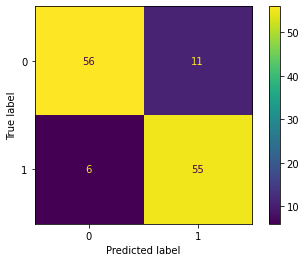

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
mlp.fit(X_train, Y_train)
print(f'MLP Accuracy: {mlp.score(X_test, Y_test)*100: .2f}')
cm = confusion_matrix(Y_test, mlp.predict(X_test))
ConfusionMatrixDisplay(cm).plot()

In [77]:
from sklearn.metrics import precision_score, recall_score, f1_score
recall = recall_score(Y_test, mlp.predict(X_test))
precision  = precision_score(Y_test, mlp.predict(X_test))
f1  = f1_score(Y_test, mlp.predict(X_test))
f'Precision: {precision} - Recall: {recall} - F1: {f1}'

'Precision: 0.84375 - Recall: 0.8852459016393442 - F1: 0.864'

In [ ]:
#e2: SVM

In [84]:
from sklearn.svm import SVC
svm = SVC(
    C=0.5,
).fit(X_train, Y_train)
validation_results = cross_validate(svm, X_train, Y_train, cv=kfold, return_train_score=True, return_estimator=True)

In [85]:
f'Train Accuracy: {validation_results["train_score"].mean()} - Validation Accuracy: {validation_results["test_score"].mean()}'

'Train Accuracy: 0.9026405419033212 - Validation Accuracy: 0.870313725490196'

SVM Accuracy:  88.28


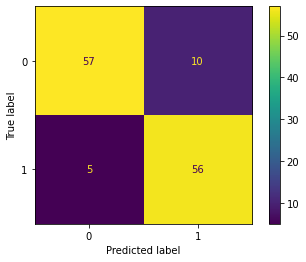

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
svm.fit(X_train, Y_train)
print(f'SVM Accuracy: {svm.score(X_test, Y_test)*100: .2f}')
cm = confusion_matrix(Y_test, svm.predict(X_test))
ConfusionMatrixDisplay(cm).plot()

In [87]:
from sklearn.metrics import precision_score, recall_score, f1_score
recall = recall_score(Y_test, svm.predict(X_test))
precision  = precision_score(Y_test, svm.predict(X_test))
f1  = f1_score(Y_test, svm.predict(X_test))
f'Precision: {precision} - Recall: {recall} - F1: {f1}'

'Precision: 0.8484848484848485 - Recall: 0.9180327868852459 - F1: 0.8818897637795275'

In [ ]:
#e3: KNN

In [102]:
from sklearn.neighbors import KNeighborsClassifier
mlp = KNeighborsClassifier(
    n_neighbors=5
).fit(X_train, Y_train)
validation_results = cross_validate(mlp, X_train, Y_train, cv=kfold, return_train_score=True, return_estimator=True)

In [103]:
f'Train Accuracy: {validation_results["train_score"].mean()} - Validation Accuracy: {validation_results["test_score"].mean()}'

'Train Accuracy: 0.8821208056245302 - Validation Accuracy: 0.8545490196078432'

KNN Accuracy:  89.06


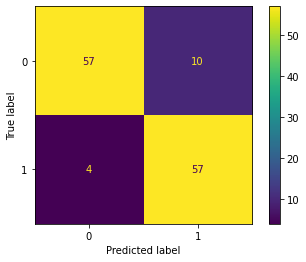

In [106]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
mlp.fit(X_train, Y_train)
print(f'KNN Accuracy: {mlp.score(X_test, Y_test)*100: .2f}')
cm = confusion_matrix(Y_test, mlp.predict(X_test))
ConfusionMatrixDisplay(cm).plot()

In [105]:
from sklearn.metrics import precision_score, recall_score, f1_score
recall = recall_score(Y_test, mlp.predict(X_test))
precision  = precision_score(Y_test, mlp.predict(X_test))
f1  = f1_score(Y_test, mlp.predict(X_test))
f'Precision: {precision} - Recall: {recall} - F1: {f1}'

'Precision: 0.8507462686567164 - Recall: 0.9344262295081968 - F1: 0.8906250000000001'

### Part f

In [109]:
from sklearn.ensemble import StackingClassifier
stacker = StackingClassifier(
    estimators=[
        ('MLP', MLPClassifier(hidden_layer_sizes=(100, 50), alpha=0.01, max_iter=200)),
        ('SVM', SVC(C=0.5,)),
        ('KNN', KNeighborsClassifier(n_neighbors=5))
    ],
    final_estimator=SVC(),
    cv=kfold
).fit(X_train, Y_train)

/home/indirected/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/indirected/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/indirected/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/indirected/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/indirected/.local/lib/pyth

Stacking Accuracy:  88.28


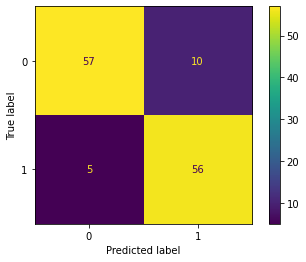

In [110]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(f'Stacking Accuracy: {stacker.score(X_test, Y_test)*100: .2f}')
cm = confusion_matrix(Y_test, stacker.predict(X_test))
ConfusionMatrixDisplay(cm).plot()

In [111]:
from sklearn.metrics import precision_score, recall_score, f1_score
recall = recall_score(Y_test, mlp.predict(X_test))
precision  = precision_score(Y_test, mlp.predict(X_test))
f1  = f1_score(Y_test, mlp.predict(X_test))
f'Precision: {precision} - Recall: {recall} - F1: {f1}'

'Precision: 0.8507462686567164 - Recall: 0.9344262295081968 - F1: 0.8906250000000001'